In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, Input
from tensorflow.keras.models import Sequential

In [162]:
df = pd.read_csv('/kaggle/input/dl-lab-week5-data/BPD_Part_1_Victim_Based_Crime_Data.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11-12-2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11-12-2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11-12-2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11-12-2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11-12-2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [163]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], infer_datetime_format=True, errors='coerce')

/tmp/ipykernel_30/298442737.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], infer_datetime_format=True, errors='coerce')


In [164]:
larceny_df = df[df['CrimeCode'].str.startswith('6')]
burglary_df = df[df['CrimeCode'].str.startswith('5')]

In [165]:
larceny = larceny_df.groupby('CrimeDate').size().resample('D').sum().fillna(0)
burglary = burglary_df.groupby('CrimeDate').size().resample('D').sum().fillna(0)

In [166]:
crime_ts = pd.DataFrame({"larceny":larceny,"burglary":burglary})

In [167]:
crime_ts

,larceny,burglary
CrimeDate,,
2011-01-01,66,21
2011-01-02,40,19
2011-01-03,35,21
2011-01-04,41,12
2011-01-05,44,28
...,...,...
2016-11-08,40,19
2016-11-09,38,26
2016-11-10,40,24


In [168]:
train = crime_ts['2014-01-01':'2015-12-31']
test = crime_ts['2016-01-01':'2016-12-31']

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train = scaler.fit_transform(train)

test = scaler.fit_transform(test)

In [170]:
train_gen = TimeseriesGenerator(train, train, length=30, batch_size=32)
test_gen = TimeseriesGenerator(test, test, length=30, batch_size=32)

In [171]:
model = Sequential([
    Input(shape=(50,2)),
    LSTM(64,return_sequences=True),
    LSTM(64,return_sequences=True),
    LSTM(64,return_sequences=True),
    LSTM(64),
    Dense(2)
])

model.compile(optimizer='adam', loss='mse', metrics=['acc'])

In [172]:
history = model.fit(train_gen, epochs=20, batch_size=32)

Epoch 1/20
 3/22 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.6026 - loss: 1.0153

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - acc: 0.6670 - loss: 0.7476
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.6825 - loss: 0.4100
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.5179 - loss: 0.3629
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - acc: 0.4183 - loss: 0.3097
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.4531 - loss: 0.3268
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.5840 - loss: 0.2626
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - acc: 0.6297 - loss: 0.2620
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.7111 - loss: 0.2259
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - acc: 0.6288 - loss: 0.2365
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.5683 - loss: 0.2482
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.5336 - loss: 0.2256
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - acc: 0.5014 - loss: 0.2145
Epoch 13/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/s

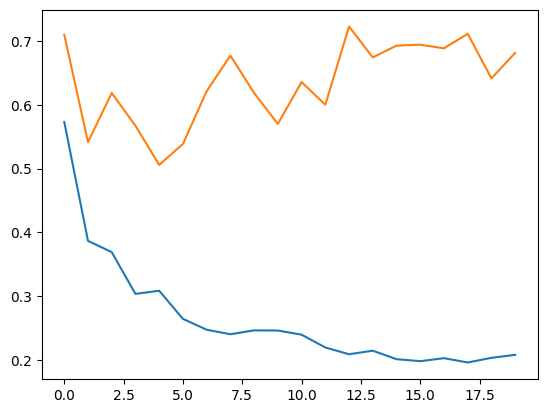

In [173]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.show()

In [174]:
model.evaluate(test_gen)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8197 - loss: 0.3646


[0.3342041075229645, 0.8397212624549866]

In [175]:
y_pred = model.predict(test_gen)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


In [191]:
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse ,classification_report as cr, confusion_matrix as cm

In [192]:
y_test = test[30:]

In [194]:
perc_err1 = mape(y_test,y_pred)
rmse1 = np.sqrt(mse(y_test,y_pred))

print("perc_error m1: ", perc_err1)
print("rmse m1: ", rmse1)

perc_error m1:  0.5021991004093604
rmse m1:  0.578103912104895
